In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

In [2]:
list_mol_tags('CDMS')

 tag             molecule          ... Date of entry    Entry   
------ --------------------------- ... ------------- -----------
  3501                          HD ...     Dec. 2011 w003501.cat
  4501                        H2D+ ...     Mar. 2017 w004501.cat
  5501                        HD2+ ...     Jan. 2018 w005501.cat
  5502                        HeH+ ...    April 2008 w005502.cat
 12501                      C-atom ...     Sep. 2005 w012501.cat
 12502                          BH ...     July 2008 w012502.cat
 12503                          C+ ...     Aug. 2010 w012503.cat
 13501                        C-13 ...     Sep. 2005 w013501.cat
 13502                          CH ...     June 2015 w013502.cat
 13503                         CH+ ...     Apr. 2010 w013503.cat
 13504                  CH+, v=1-0 ...      May 2010 w013504.cat
 13505                  CH+, v=2-0 ...      May 2010 w013505.cat
 13506                      C-13-+ ...     Aug. 2010 w013506.cat
 14501                   

tag,molecule,Name,#lines,lg(Q(1000)),lg(Q(500)),lg(Q(300)),lg(Q(225)),lg(Q(150)),lg(Q(75)),lg(Q(37.5)),lg(Q(18.75)),lg(Q(9.375)),lg(Q(5.000)),lg(Q(2.725)),Ver.,Documentation,Date of entry,Entry
int64,str27,str34,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str11,str10,str11
3501,HD,HD,20,1.2115,0.9135,0.7026,0.5876,0.4322,0.1964,0.0406,0.0014,0.0,0.0,0.0,2*,e003501.cat,Dec. 2011,w003501.cat
4501,H2D+,H2D+,196,nan,2.2148,1.8834,1.6986,1.4401,0.9882,0.4919,0.0846,0.0016,0.0,0.0,3*,e004501.cat,Mar. 2017,w004501.cat
5501,HD2+,HD2+,163,nan,nan,1.9098,1.7243,1.4652,1.0326,0.6405,0.3772,0.3049,0.3011,0.301,3*,e005501.cat,Jan. 2018,w005501.cat
5502,HeH+,HeH+,18,1.332,1.0335,0.8192,0.7015,0.5406,0.2874,0.0904,0.0075,0.0,nan,nan,1*,e005502.cat,April 2008,w005502.cat
12501,C-atom,C,2,0.9359,0.9177,0.8939,0.8744,0.8363,0.7295,0.5494,0.3075,0.0962,0.0114,0.0002,1*,e012501.cat,Sep. 2005,w012501.cat
12502,BH,BH,15,nan,nan,1.2565,1.1339,0.9629,0.6781,0.4105,0.1794,0.0334,nan,nan,1*,e012502.cat,July 2008,w012502.cat
12503,C+,C+,1,0.7521,0.727,0.6947,0.669,0.6209,0.5032,0.3713,0.3077,0.3011,0.301,0.301,1*,e012503.cat,Aug. 2010,w012503.cat
13501,C-13,13C,7,1.2369,1.2188,1.195,1.1755,1.1374,1.0305,0.8504,0.6085,0.3972,0.3125,0.3012,1*,e013501.cat,Sep. 2005,w013501.cat
13502,CH,CH,513,nan,2.3005,2.0822,1.9608,1.7924,1.5175,1.2752,1.0864,0.9523,0.9013,0.8906,3*,e013502.cat,June 2015,w013502.cat


In [3]:
list_mol_tags('JPL')

 TAG        NAME     NLINE  QLOG1  QLOG2  ... QLOG4  QLOG5   QLOG6  QLOG7  VER
------ ------------- ------ ------ ------ ... ------ ------ ------- ------ ---
  1001        H-atom      1 0.6021 0.6021 ... 0.6021 0.6021  0.6021 0.6021   1
  2001        D-atom      1 0.7782 0.7782 ... 0.7782 0.7782  0.7782 0.7782   1
  3001            HD      1 0.7004 0.5864 ... 0.1962 0.0406  0.0014 0.0001   2
  4001          H2D+     32 1.8834 1.6986 ... 0.9882 0.4919  0.0846 0.0016  2*
  7001        Li-6-H     51 1.4493 1.3248 ... 0.8603 0.5803  0.3226 0.1138  2*
  8001           LiH     53 1.4581 1.3336 ... 0.8688 0.5883  0.3297 0.1188  2*
  8002        Li-6-D     80 1.6901 1.5631 ... 1.0921 0.8029  0.5263 0.2755   1
  9001           LiD     90  1.706 1.5788 ... 1.1075 0.8173  0.5403 0.2876   1
 12001        C-atom      2 0.8939 0.8744 ... 0.7295 0.5494  0.3075 0.0962   2
 13001     C-13-atom      7  1.195 1.1754 ... 1.0305 0.8504  0.6085 0.3972   2
 13002            CH    508 2.0822 1.9608 ... 1.5175

TAG,NAME,NLINE,QLOG1,QLOG2,QLOG3,QLOG4,QLOG5,QLOG6,QLOG7,VER
int64,str13,int64,float64,float64,float64,float64,float64,float64,float64,str2
1001,H-atom,1,0.6021,0.6021,0.6021,0.6021,0.6021,0.6021,0.6021,1
2001,D-atom,1,0.7782,0.7782,0.7782,0.7782,0.7782,0.7782,0.7782,1
3001,HD,1,0.7004,0.5864,0.4315,0.1962,0.0406,0.0014,0.0001,2
4001,H2D+,32,1.8834,1.6986,1.4401,0.9882,0.4919,0.0846,0.0016,2*
7001,Li-6-H,51,1.4493,1.3248,1.1515,0.8603,0.5803,0.3226,0.1138,2*
8001,LiH,53,1.4581,1.3336,1.1602,0.8688,0.5883,0.3297,0.1188,2*
8002,Li-6-D,80,1.6901,1.5631,1.3878,1.0921,0.8029,0.5263,0.2755,1
9001,LiD,90,1.706,1.5788,1.4034,1.1075,0.8173,0.5403,0.2876,1
12001,C-atom,2,0.8939,0.8744,0.8363,0.7295,0.5494,0.3075,0.0962,2


In [3]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [4]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [5]:
# Get only the cubes that have our line of interest in them
mol_tag = 44505
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=3>
   FREQ      ERR    LGINT    DR     ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l      name     Lab 
   MHz       MHz   MHz nm2         1 / cm          u                                                                                                        
 float64   float64 float64 int64  float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64    str11     bool
---------- ------- ------- ----- --------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----------- -----
85640.4531  0.0005 -7.5817     2 2448.7636     5    44  5051   202     2     2    --    --    --    --     1     2    --    --    --    -- SiO, v=0-10 False
86243.4277  0.0004 -5.0448     2 1231.0532     5    44  5051   202     2     1    --    --    --    --     1     1    --    --    --    -- SiO, v=0-10 False
 86846.985   0.004 -2.4832     2    1.44

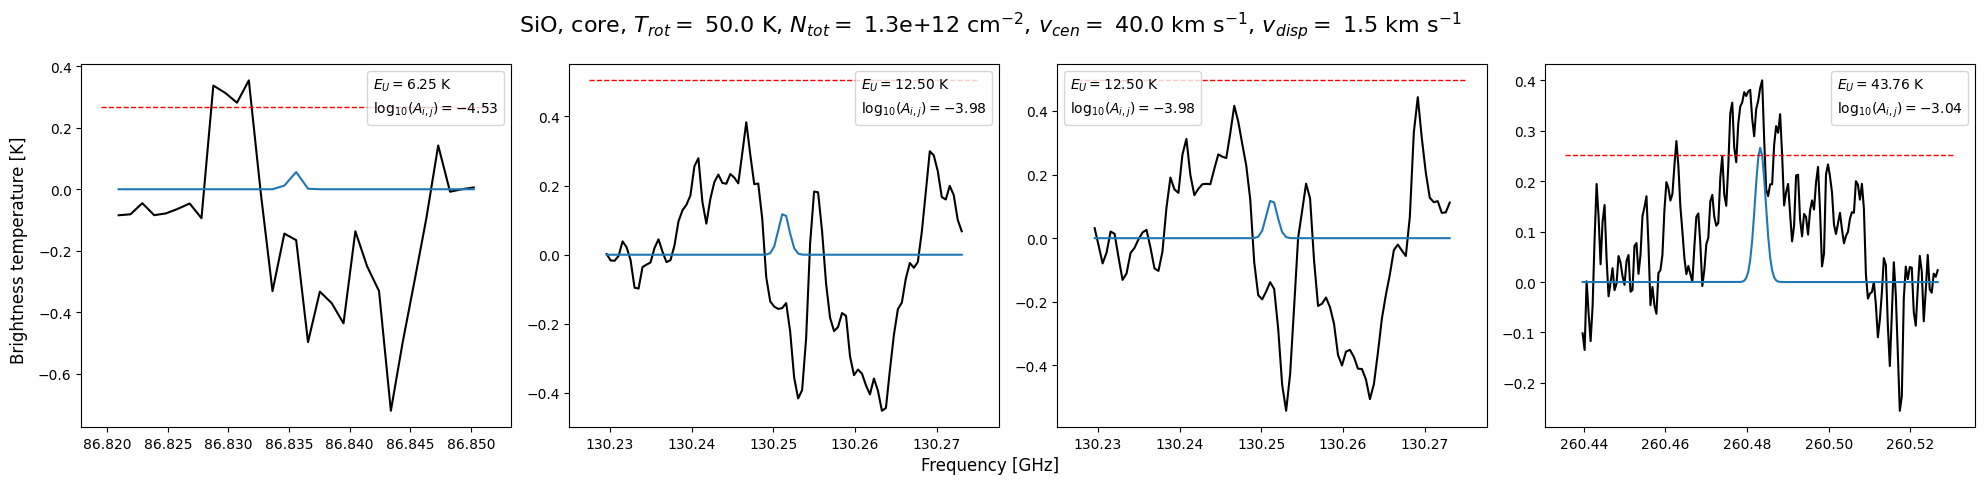

In [6]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 1.3e+12, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=5, 
               nrows=1, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=f'SiO', extr_type="coord", crd=crd,
               show_2_sigma=True)

In [7]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

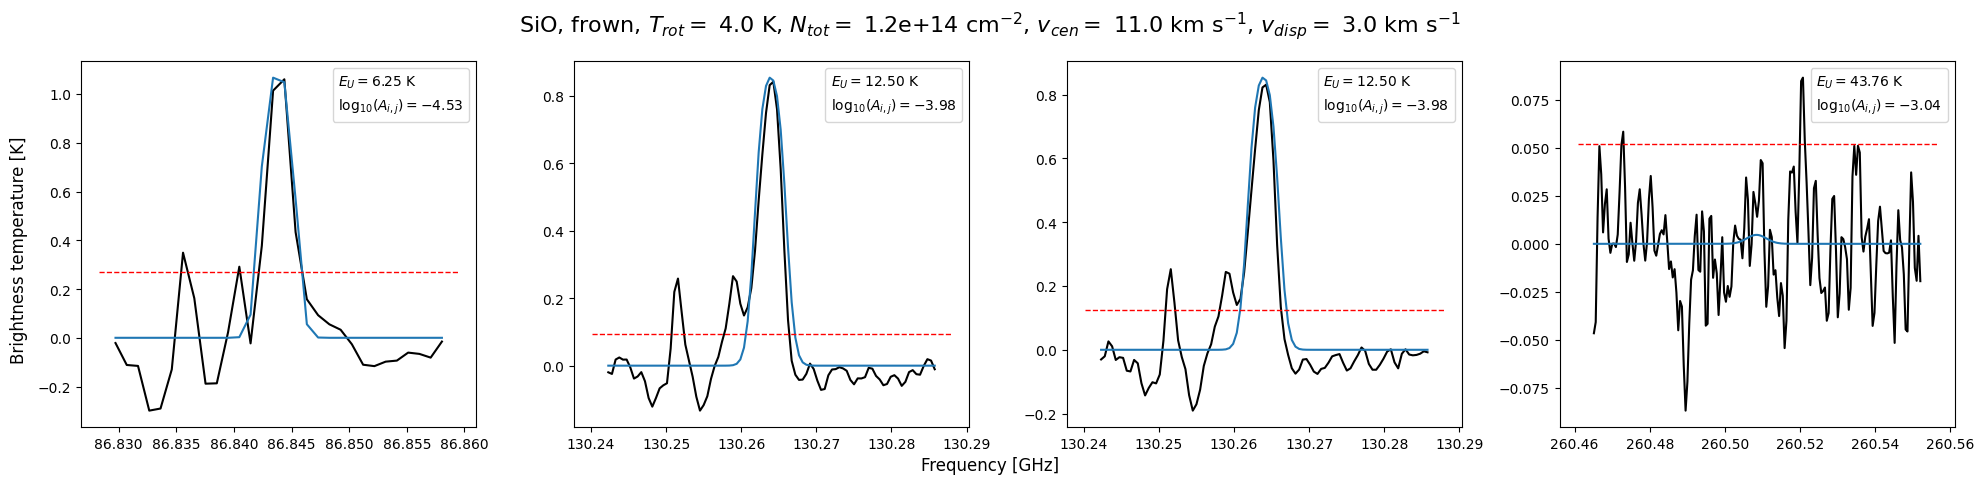

In [8]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 4., N_tot = 1.2e+14, v_cen = 11.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=5, 
                       nrows=1, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=f'SiO', extr_type="reg", just_data=False, 
                       show_2_sigma=True, return_freqs=True)

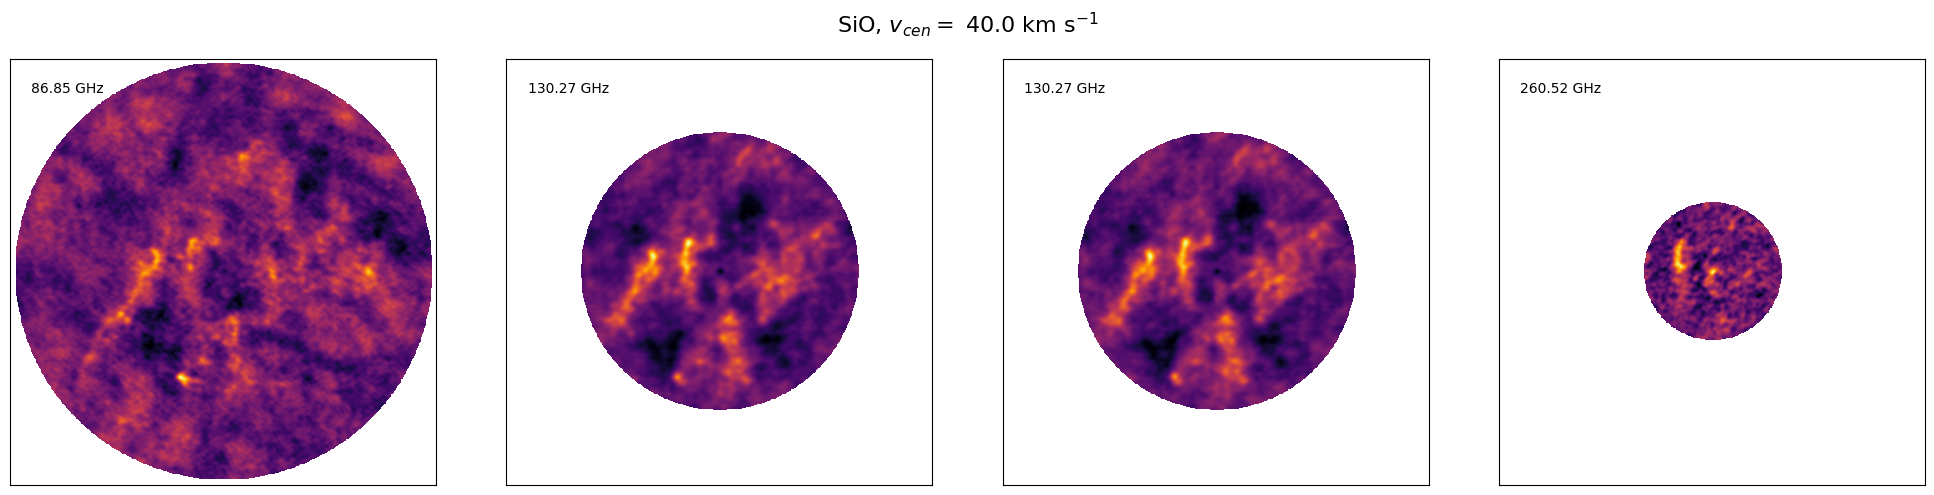

In [9]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=20, fig_height=5, nrows=1, ncols=4, name_for_plot=f'SiO')

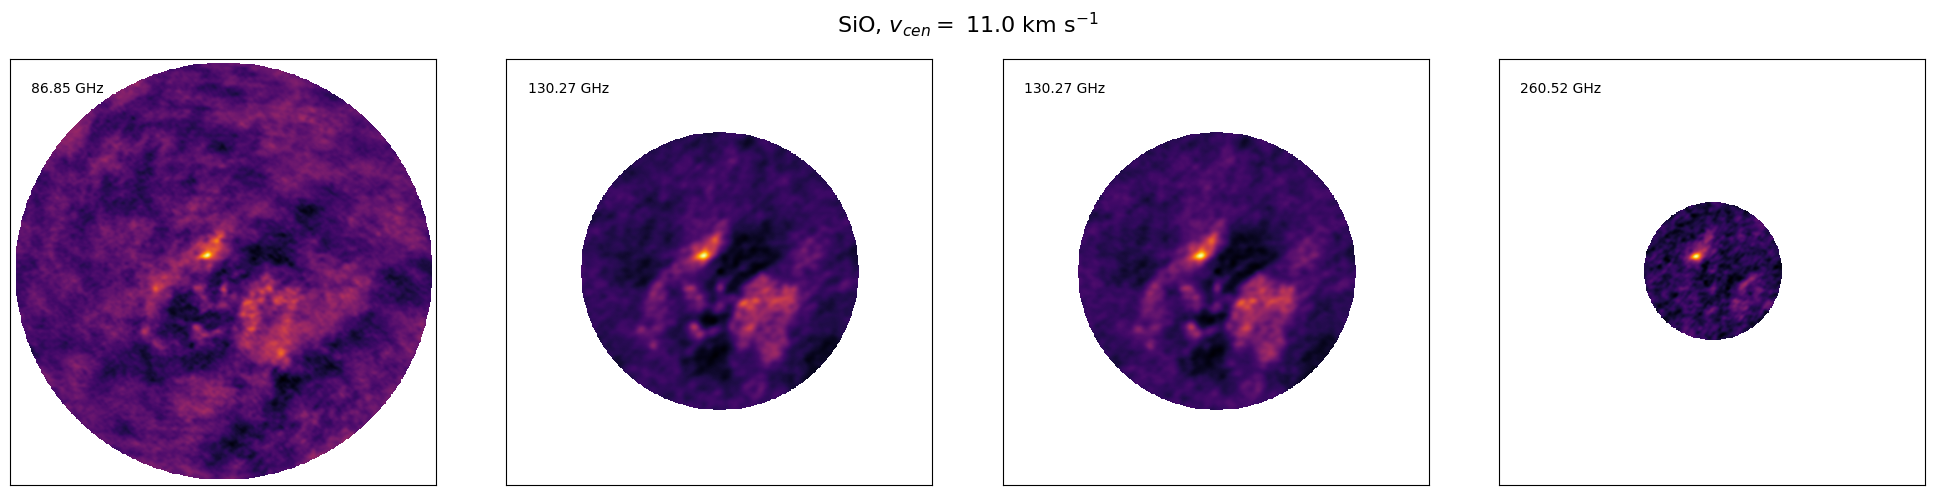

In [10]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=11*u.km/u.s, fig_width=20, fig_height=5, nrows=1, ncols=4, name_for_plot=f'SiO')